# Çalışmalardan

* Epoch 20 civarı yetiyor, temeli görmede.
* Rebust ve learning rate sabit. Ilk 1 LSTM 1 Dense layer. LSTM node(neuronları) artacak sürekli for döngüsü ile.



```
dataya, kendisinde sonra ki 5 veya 15 row da %1 cikacak ve dusecek rowlara 1 digerlerine sifir ekle.
modeli oyle calisirtir.
```


ayrica model optimizasyonuna dikkat etmen gerekiyor.





## Imports

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from google.colab import files
import pandas as pd
import datetime
import time
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import RobustScaler

## Data

In [50]:
# Deneme datayı alıyoruz
prices = pd.read_csv("10bin-row-Denemelik-with-rsi.csv")  # Placeholder for your dataset
prices.set_index('Timestamp', inplace=True)

In [25]:
len(prices)

10000

In [34]:
min = prices["Close"].iloc[1+1:1+6].min()

In [35]:
min

101725.4921875

In [29]:
 prices["Close"].iloc[1]

101873.921875

In [40]:
prices["Close"].iloc[1] * 0.005

509.36960937500004

In [43]:
abs( prices["Close"].iloc[1] - min - 200)

51.5703125

In [51]:
# Change sütunu için varsayılan değerler
prices["Change_up"] = 0
prices["Change_down"] = 0
for i in range(len(prices) - 4):  # Son 4 eleman için işlem yapmaya gerek yok
    min = prices["Close"].iloc[i+1:i+6].min()
    max = prices["Close"].iloc[i+1:i+6].max()
    if  abs(prices["Close"].iloc[i] - min) > i*0.0049:
        prices.loc[i, "Change_down"] = 1
    elif  abs(prices["Close"].iloc[i] - max) > i*0.0049:
        prices.loc[i,"Change_up"] = 1


Görüntülenen çıkış son 5000 satıra kısaltıldı.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  prices["Change_down"].iloc[i] = 1
<ipython-input-51-a444808aa626>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices["Change_down"].iloc[i] = 1
<ipython-input-51-a444808aa626>:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are sett

In [61]:
prices.to_csv("denemelik", index=True)


In [63]:
pd.read_csv("denemelik")

,Timestamp,Open,Close,High,Low,Volume,RSI14,RSI7,Change_up,Change_down
0,2025-01-29 01:06:00+00:00,101823.437500,101823.437500,101823.437500,101823.437500,4.198400e+06,100.000000,100.000000,0,1
1,2025-01-29 01:07:00+00:00,101873.921875,101873.921875,101873.921875,101873.921875,0.000000e+00,100.000000,100.000000,0,1
2,2025-01-29 01:08:00+00:00,101869.515625,101869.515625,101869.515625,101869.515625,5.242880e+05,91.972673,91.972673,0,1
3,2025-01-29 01:11:00+00:00,101857.789062,101857.789062,101857.789062,101857.789062,2.831647e+08,75.782808,75.782808,0,1
4,2025-01-29 01:12:00+00:00,101859.617188,101859.617188,101859.617188,101859.617188,1.658880e+06,76.429631,76.429631,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,2025-02-06 23:53:00+00:00,96553.992188,96553.992188,96553.992188,96553.992188,0.000000e+00,51.308496,77.058162,1,0
9996,2025-02-06 23:54:00+00:00,96596.531250,96596.531250,96596.531250,96596.531250,0.000000e+00,49.108146,77.121909,0,0
9997,2025-02-06 23:56:00+00:00,96609.601562,96609.601562,96609.601562,96609.601562,1.242718e+09,54.716479,77.569195,0,0
9998,2025-02-06 23:57:00+00:00,96611.054688,96611.054688,96611.054688,96611.054688,0.000000e+00,56.259246,69.927258,0,0


In [64]:
pd.read_csv("denemelik.csv")

,Timestamp,Open,Close,High,Low,Volume,RSI14,RSI7,Change_up,Change_down
0,2025-01-29 01:06:00+00:00,101823.437500,101823.437500,101823.437500,101823.437500,4.198400e+06,100.000000,100.000000,0,1
1,2025-01-29 01:07:00+00:00,101873.921875,101873.921875,101873.921875,101873.921875,0.000000e+00,100.000000,100.000000,0,1
2,2025-01-29 01:08:00+00:00,101869.515625,101869.515625,101869.515625,101869.515625,5.242880e+05,91.972673,91.972673,0,1
3,2025-01-29 01:11:00+00:00,101857.789062,101857.789062,101857.789062,101857.789062,2.831647e+08,75.782808,75.782808,0,1
4,2025-01-29 01:12:00+00:00,101859.617188,101859.617188,101859.617188,101859.617188,1.658880e+06,76.429631,76.429631,0,1
...,...,...,...,...,...,...,...,...,...,...
9995,2025-02-06 23:53:00+00:00,96553.992188,96553.992188,96553.992188,96553.992188,0.000000e+00,51.308496,77.058162,1,0
9996,2025-02-06 23:54:00+00:00,96596.531250,96596.531250,96596.531250,96596.531250,0.000000e+00,49.108146,77.121909,0,0
9997,2025-02-06 23:56:00+00:00,96609.601562,96609.601562,96609.601562,96609.601562,1.242718e+09,54.716479,77.569195,0,0
9998,2025-02-06 23:57:00+00:00,96611.054688,96611.054688,96611.054688,96611.054688,0.000000e+00,56.259246,69.927258,0,0


In [ ]:
filse.download()

In [54]:
len(prices)

10000

In [ ]:
# ✅ Scaling with RobustScaler (better for handling BTC's outliers)
scaler = RobustScaler()
scaled_prices = scaler.fit_transform(prices)

# ✅ Convert back to DataFrame
scaled_prices = pd.DataFrame(scaled_prices, columns=prices.columns, index=prices.index)

look_back = 240  # Use 240 past candles as input
future_step = 1

X, y = [], []
for i in range(len(scaled_prices) - look_back - future_step):
    X.append(scaled_prices.iloc[i : i + look_back].values)  # Collect 240 timesteps
    y.append(scaled_prices.iloc[i + look_back + future_step - 1]["Close"])  # Close at t+1

# Convert to NumPy arrays
X = np.array(X)  # Shape: (samples, 240, features)
y = np.array(y)  # Shape: (samples,)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ✅ Get the datetime index for the test set
X_test_indices = scaled_prices.index[-len(X_test):]


In [ ]:
# Checking the data shape
print(f"After reshaping: X_train shape = {X_train.shape}")  # (N, 1, 4) --> Correct shape
print(f"After reshaping: X_test shape = {X_test.shape}")  # (N, 1, 4) --> Correct shape
print(f"After reshaping: y_train shape = {y_train.shape}")  # (N, 1, 4) --> Correct shape
print(f"After reshaping: y_test shape = {y_test.shape}")  # (N, 1, 4) --> Correct shape

After reshaping: X_train shape = (7807, 240, 7)
After reshaping: X_test shape = (1952, 240, 7)
After reshaping: y_train shape = (7807,)
After reshaping: y_test shape = (1952,)


## Fonks

In [ ]:
def produce_predictions(model,scaled_prices):
    y_pred = model.predict(X_test)
    df_pre =  pd.DataFrame(columns=["timestamp","p_price", "r_price"])
    X_test_indices = scaled_prices.index[-len(X_test):]
    for i in range(len(y_pred)):
      y_pred_inv = scaler.inverse_transform(
      [[0, y_pred[i][0], 0, 0, 0, 0, 0]]
      )[0][1]
      y_test_inv = scaler.inverse_transform(
      [[0, y_test[i], 0, 0, 0, 0, 0]]
      )[0][1]
      new_row = pd.DataFrame([{"timestamp":X_test_indices[i], "p_price": y_pred_inv, "r_price": y_test_inv}])
      # Use pd.concat() to add the new row
      df_pre = pd.concat([df_pre, new_row], ignore_index=True)
    df_pre.to_csv(f"{model.name}_tahmin.csv")
    files.download(f"{model.name}_tahmin.csv")
    return df_pre

In [ ]:
def plotting_predictions(df_pre, filename):
  # Convert timestamp to datetime (if not already done)
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])
  # Create a line plot
  plt.figure(figsize=(14, 8))
  plt.plot( df_pre['timestamp'], df_pre['p_price'], label='Predicted Price (pre_price)', color='blue', marker='o', markersize=4)
  plt.plot(df_pre['timestamp'], df_pre['r_price'], label='Real Price (real_price)', color='red', marker='o', markersize=4)
  # Customize the axes and figure background
  ax = plt.gca()
  ax.set_facecolor('black')  # Set axes' background to black
  ax.tick_params(axis='both', colors='black')  # Set tick marks and labels to white
  ax.xaxis.label.set_color('white')  # Set x-axis label to white
  ax.yaxis.label.set_color('white')  # Set y-axis label to white
  ax.title.set_color('black')  # Set title color to white
  # Format the x-axis for minute-based grids
  ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))  # Grid every 5 minutes
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%M'))  # Format as HH:MM
  # Add labels and title
  plt.xlabel('Timestamp')
  plt.ylabel('Price')
  plt.title('Predicted vs Real Price Over Time')
  plt.legend()
  plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray')
  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45)
  # Show the plot
  plt.tight_layout()
  plt.savefig(filename, format='png')  # Change the format if needed, e.g., 'jpg', 'svg'
  files.download(filename)  # This will prompt you to download the file
  plt.show()

## For Döngüsüyle farklı modeller yapma ve bunların loss değerlerini ele alma

`3 Layers;`

**LSTM** (4-5-6, input_shape=(lookback(240), 7), return_sequences=True),

**LSTM** (4-5-6, return_sequences=False,)

**Dense** (1),

**`Optimizer = Adam(0.01)`**

**`Epoch = 20`**


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


model_4
model_4 fitting is starting ----------------------------------->
Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - loss: 0.0924 - val_loss: 0.0028
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 40s 124ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 28s 127ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 40s 124ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 124ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 126ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 43s 135ms/step - loss: 0.0011 - val_loss: 9.9919e-04
Epoch 9/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 27s 125ms/step - loss: 7.4988e-04 - val_loss: 0.0014
Epoch 10/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 125ms/step - loss: 8.6573e-04 - val_loss: 0.0019
Epoch 11/20
220/220 ━━━━

<ipython-input-25-90f233920be6>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pre = pd.concat([df_pre, new_row], ignore_index=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-26-69a135362a22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

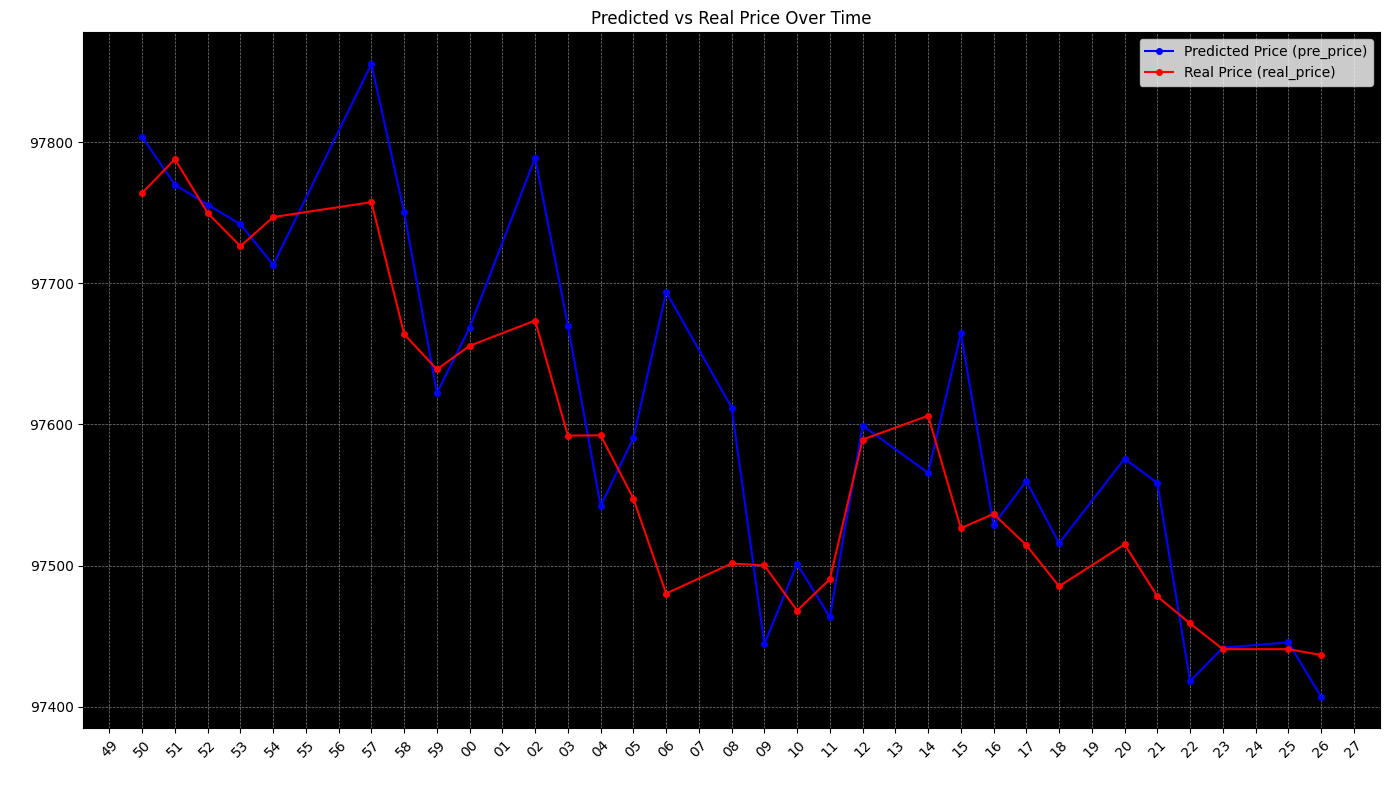

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


model_5
model_5 fitting is starting ----------------------------------->
Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - loss: 0.1440 - val_loss: 0.0063
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - loss: 0.0015 - val_loss: 0.0025
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 29s 130ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - loss: 0.0011 - val_loss: 0.0046
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - loss: 8.0534e-04 - val_loss: 0.0020
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 40s 128ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - loss: 9.0998e-04 - val_loss: 0.0033
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 28s 128ms/step - loss: 8.1510e-04 - val_loss: 0.0021
Epoch 9/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 128ms/step - loss: 8.5458e-04 - val_loss: 0.0028
Epoch 10/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - loss: 7.6817e-04 - val_loss: 0.0015
Epoch 11/20
220/

<ipython-input-25-90f233920be6>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pre = pd.concat([df_pre, new_row], ignore_index=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-26-69a135362a22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

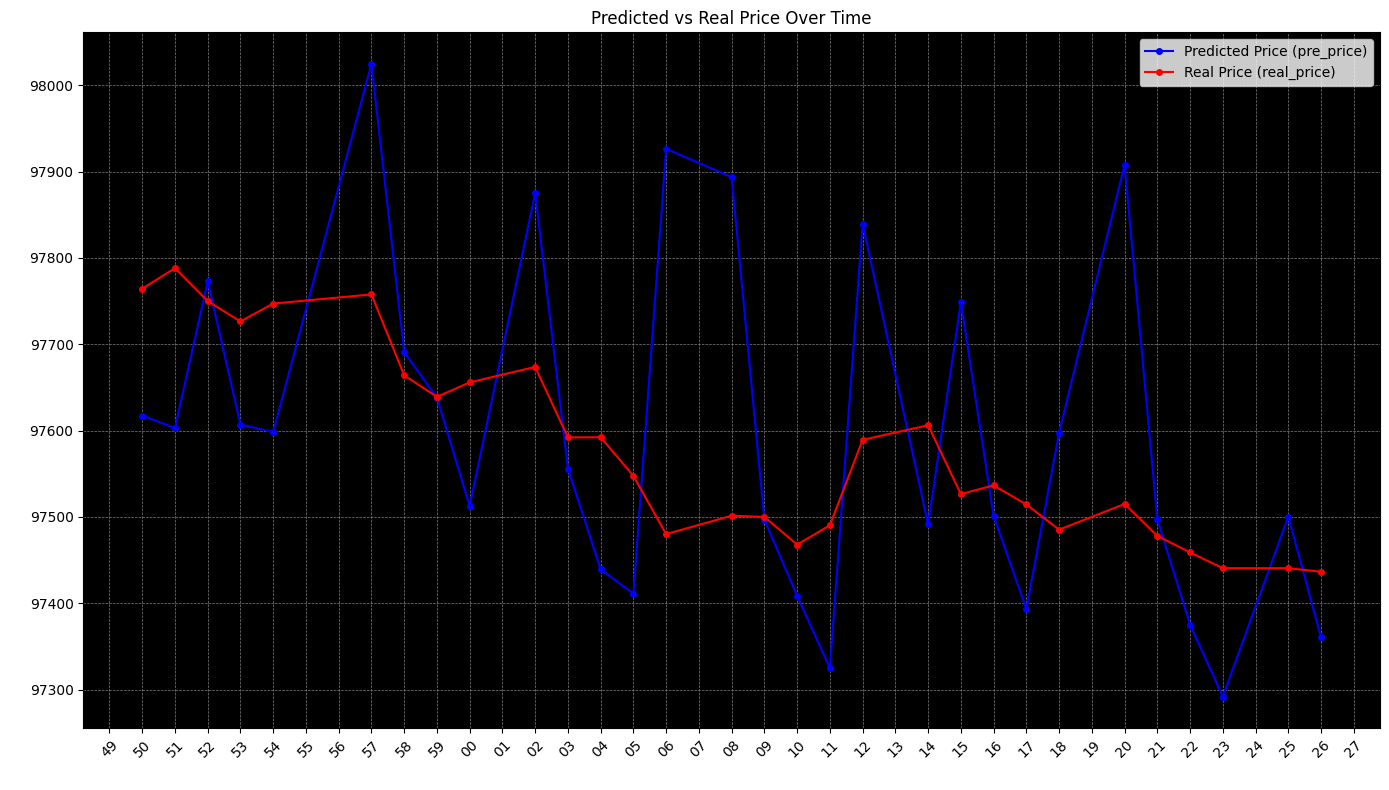

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


model_6
model_6 fitting is starting ----------------------------------->
Epoch 1/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - loss: 0.0911 - val_loss: 0.0029
Epoch 2/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 40s 133ms/step - loss: 0.0016 - val_loss: 0.0037
Epoch 3/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 4/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 5/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 29s 130ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 6/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 43s 140ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 7/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 29s 131ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 8/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 129ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 9/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 42s 134ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 10/20
220/220 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - loss: 0.0010 - val_loss: 0.0025
Epoch 11/20
220/220 ━━━━━━━━━━━━━━━━

<ipython-input-25-90f233920be6>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_pre = pd.concat([df_pre, new_row], ignore_index=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-26-69a135362a22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pre['timestamp'] = pd.to_datetime(df_pre['timestamp'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

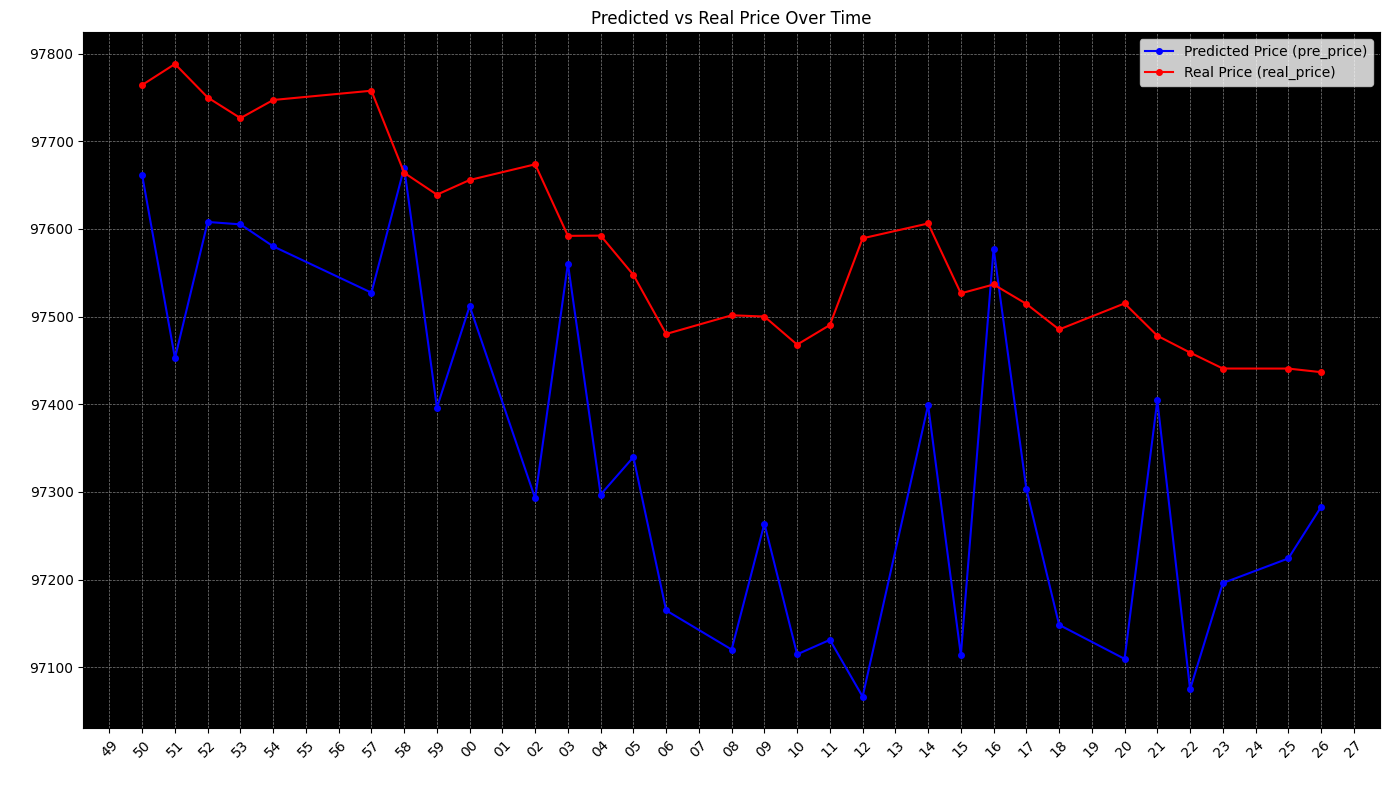

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range (4,7):
  model = Sequential([
      LSTM(i, return_sequences=True, input_shape=(240, 7)),
      LSTM(i, return_sequences=False),
      Dense(i),
      Dense(1)
  ],name=f"model_{i}")
  print(model.name)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')
  # Early stopping callback
  #early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
  print(f"{model.name} fitting is starting ----------------------------------->")
  model.fit(
      X_train, y_train,
      validation_split=0.1,
      epochs=20,
      batch_size=32,
      #callbacks=[early_stop]
  )
  eval = model.evaluate(X_test, y_test)
  print (f"Eval değerler = {eval} ----------------------------------->")

  df_pre_6 = produce_predictions(model,scaled_prices)
  plotting_predictions(df_pre_6[0:30], f"{model.name}.png")
  model.save(f"{model.name}.h5")
  files.download(f"{model.name}.h5")

# MixMaxScaler Modelleri devamı


## Model_22 - 24
`3 Layers;`

**LSTM** (7,8,9, input_shape=(lookback(240), 7), return_sequences=True, activation='tanh),

**LSTM** (7,8,9, return_sequences=False, activation='tanh'),

**Dense** (7,8,9, activation='relu')

**Dense** (1),

**`Optimizer = Adam(0.001)`**

## Model_25 - 28
`3 Layers;`

**LSTM** (10-11-12, input_shape=(lookback(240), 7), return_sequences=True),

**LSTM** (10-11-12, return_sequences=False,)

**Dense** (10-11-12)

**Dense** (1),

**`Optimizer = Adam(0.01)`**

**`Epoch = 20`**

## Model_28 - 30

`3 Layers;`

**LSTM** (13,14,15, input_shape=(lookback(240), 7), return_sequences=True, activation='tanh),

**LSTM** (13,14,15, return_sequences=False, activation='tanh'),

**Dense** (13,14,15, activation='relu')

**Dense** (1),

**`Optimizer = Adam(0.0001)`**
**`Epoch = 25`**

## Model_31 - 33

`3 Layers;`

**LSTM** (13,14,15, input_shape=(lookback(240), 7), return_sequences=True),

**LSTM** (13,14,15, return_sequences=False),

**Dense** (13,14,15, activation='relu')

**Dense** (1),

**`Optimizer = Adam(0.01)`**

**`Epoch = 25`**

# RobustScaler Modelleri


## Model 1-3

`3 Layers;`

**LSTM** (1,2,3, input_shape=(lookback(240), 7), return_sequences=True, activation=('tanh)),

**LSTM** (1,2,3, return_sequences=False),

**Dense** (1,2,3, activation='relu')

**Dense** (1),

**`Optimizer = Adam(0.01)`**

**`Epoch = 25`**

# Model 4-6

`3 Layers;`

**LSTM** (4-5-6, input_shape=(lookback(240), 7), return_sequences=True),

**LSTM** (4-5-6, return_sequences=False,)

**Dense** (1),

**`Optimizer = Adam(0.01)`**

**`Epoch = 20`**

# Predictions

In [ ]:
a = model_20
df_pre_6 = produce_predictions(a,scaled_prices)
plotting_predictions(df_pre_6[0:30], f"{a.name}.png")

# Save

In [ ]:
a.save(f"{a.name}.h5")
files.download(f"{a.name}.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>